<a href="https://colab.research.google.com/github/giladelian/Ads/blob/main/ads_gilad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import io
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report,  confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
uploaded = files.upload()

Saving advertisments.csv to advertisments (1).csv


In [ ]:
ads = pd.read_csv(io.BytesIO(uploaded['advertisments (1).csv']))

In [ ]:
ads.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
ads.shape

(400, 5)

In [ ]:
ads.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
ads['Purchased'].unique()

array([0, 1])

In [ ]:
ads_clean = ads.drop(columns = ['User ID'])

In [ ]:
ads_clean

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
X = pd.get_dummies(ads_clean['Gender']).join(ads_clean['Age']).join(ads_clean['EstimatedSalary'])
X.head()

,Female,Male,Age,EstimatedSalary
0,0,1,19,19000
1,0,1,35,20000
2,1,0,26,43000
3,1,0,27,57000
4,0,1,19,76000


In [ ]:
y = ads_clean['Purchased']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
log_reg = LogisticRegression(solver='liblinear')

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
predictions  = log_reg.predict(X_test)

In [ ]:
confusion_matrix(y_test, predictions)

array([[76,  1],
       [35,  8]])

In [ ]:
log_reg.score(X_test, y_test)

0.7

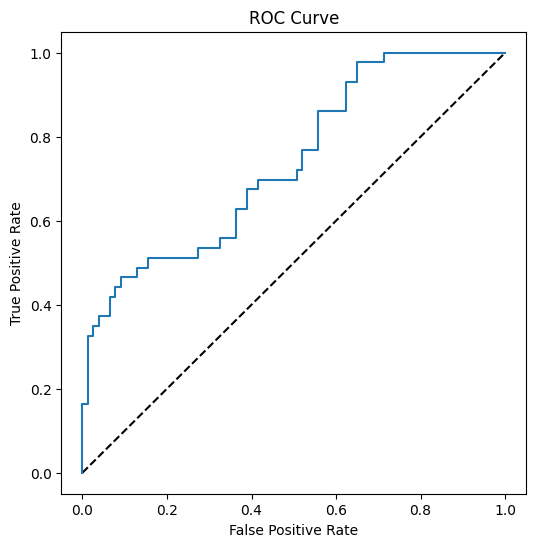

In [ ]:
y_scores = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
sc = StandardScaler()

In [ ]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
log_reg_scaled = LogisticRegression()

In [ ]:
log_reg_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
predictions_scaled= log_reg_scaled.predict(X_test_scaled)

In [ ]:
confusion_matrix(y_test, predictions_scaled)

array([[70,  7],
       [ 9, 34]])

In [ ]:
log_reg_scaled.score(X_test_scaled, y_test)

0.8666666666666667

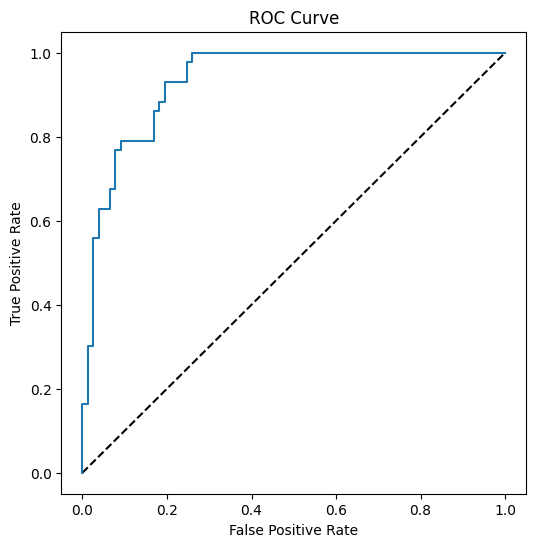

In [ ]:
y_scores_scaled = log_reg_scaled.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_scores_scaled[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.7375415282392026


In [ ]:
auc = roc_auc_score(y_test,y_scores_scaled[:,1])
print(auc)

0.933856840833585


In [ ]:
from sklearn import svm

from sklearn.svm import SVC


In [ ]:
classif = svm.SVC(probability = True)
classif.fit(X_train_scaled, y_train)

SVC(probability=True)

In [ ]:
pred_svc_scaled = classif.predict(X_test_scaled)


In [ ]:
#logistic regression unscaled data
confusion_matrix(y_test, predictions)

array([[76,  1],
       [35,  8]])

In [ ]:
#logistic regression on scaled data
confusion_matrix(y_test, predictions_scaled)


array([[70,  7],
       [ 9, 34]])

In [ ]:
#Support Vector Clasifier on scaled data
confusion_matrix(y_test, pred_svc_scaled)

array([[68,  9],
       [ 4, 39]])

In [ ]:
classif.score(X_test_scaled, y_test)

0.8916666666666667

In [ ]:
log_reg_scaled.score(X_test_scaled, y_test)

0.8666666666666667

In [ ]:
classif.predict(X_test_scaled)

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
classif.predict_proba(X_test_scaled)

array([[0.16486619, 0.83513381],
       [0.20068071, 0.79931929],
       [0.91780885, 0.08219115],
       [0.91705003, 0.08294997],
       [0.96441085, 0.03558915],
       [0.96585891, 0.03414109],
       [0.99201771, 0.00798229],
       [0.07119534, 0.92880466],
       [0.5785325 , 0.4214675 ],
       [0.15955108, 0.84044892],
       [0.98513496, 0.01486504],
       [0.83915811, 0.16084189],
       [0.28332767, 0.71667233],
       [0.99175511, 0.00824489],
       [0.98999475, 0.01000525],
       [0.09979231, 0.90020769],
       [0.95296301, 0.04703699],
       [0.93576863, 0.06423137],
       [0.99057526, 0.00942474],
       [0.98296384, 0.01703616],
       [0.89626964, 0.10373036],
       [0.97569928, 0.02430072],
       [0.94357243, 0.05642757],
       [0.16481233, 0.83518767],
       [0.97147684, 0.02852316],
       [0.033523  , 0.966477  ],
       [0.99189343, 0.00810657],
       [0.11489033, 0.88510967],
       [0.9695789 , 0.0304211 ],
       [0.82568159, 0.17431841],
       [0.

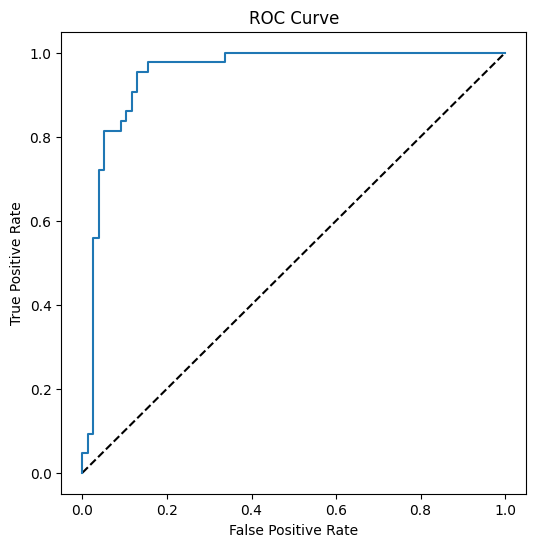

In [ ]:
y_scores_svm = classif.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_scores_svm[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
auc = roc_auc_score(y_test,y_scores_svm[:,1])
print(auc)

0.948655995167623


In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
clf = SGDClassifier(loss= "log_loss", penalty="elasticnet",max_iter=1000)
clf.fit(X_test_scaled, y_test)


SGDClassifier(loss='log_loss', penalty='elasticnet')

In [ ]:
predict_sgd = clf.predict(X_test_scaled)

In [ ]:
confusion_matrix(y_test, predict_sgd)

array([[63, 14],
       [ 9, 34]])

In [ ]:
clf.score(X_test_scaled, y_test)

0.8083333333333333

In [ ]:
clf.predict_proba(X_test_scaled)

array([[9.66305778e-04, 9.99033694e-01],
       [2.54713096e-02, 9.74528690e-01],
       [7.40233113e-01, 2.59766887e-01],
       [9.99999998e-01, 2.45831880e-09],
       [9.63882507e-01, 3.61174931e-02],
       [9.98568459e-01, 1.43154059e-03],
       [9.99998882e-01, 1.11795980e-06],
       [1.03830100e-09, 9.99999999e-01],
       [1.92931129e-02, 9.80706887e-01],
       [2.07374564e-01, 7.92625436e-01],
       [9.99987698e-01, 1.23022161e-05],
       [2.38360602e-01, 7.61639398e-01],
       [3.63788078e-03, 9.96362119e-01],
       [9.99999881e-01, 1.19372651e-07],
       [9.99778758e-01, 2.21242173e-04],
       [3.13314519e-05, 9.99968669e-01],
       [9.99971736e-01, 2.82636046e-05],
       [9.99984190e-01, 1.58095994e-05],
       [9.99968769e-01, 3.12312840e-05],
       [9.96700304e-01, 3.29969602e-03],
       [9.99999714e-01, 2.86467400e-07],
       [9.91385676e-01, 8.61432431e-03],
       [1.00000000e+00, 6.65733325e-11],
       [8.11424906e-01, 1.88575094e-01],
       [9.993249

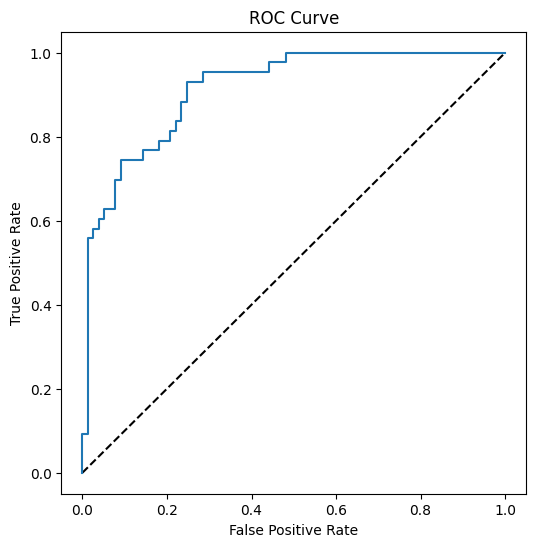

In [ ]:
y_scores_clf = clf.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_scores_clf[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()